Golden Ratio Notebook
* Examines the movement of a stock

Tutor
* Anthropic's AI Claude

The underlying theory here is that stock prices might tend to move between levels that are related by the golden ratio. For example, if a stock price rises, it might face resistance at a level that's about 1.618 times its previous stable price. Conversely, if it falls, it might find support at a level that's about 0.618 (1/1.618) times its previous stable price.

It's important to note that this is a simplified model and hypothesis. In reality, stock movements are influenced by numerous complex factors. The golden ratio levels in this model serve more as points of interest rather than definitive predictors of price movement.

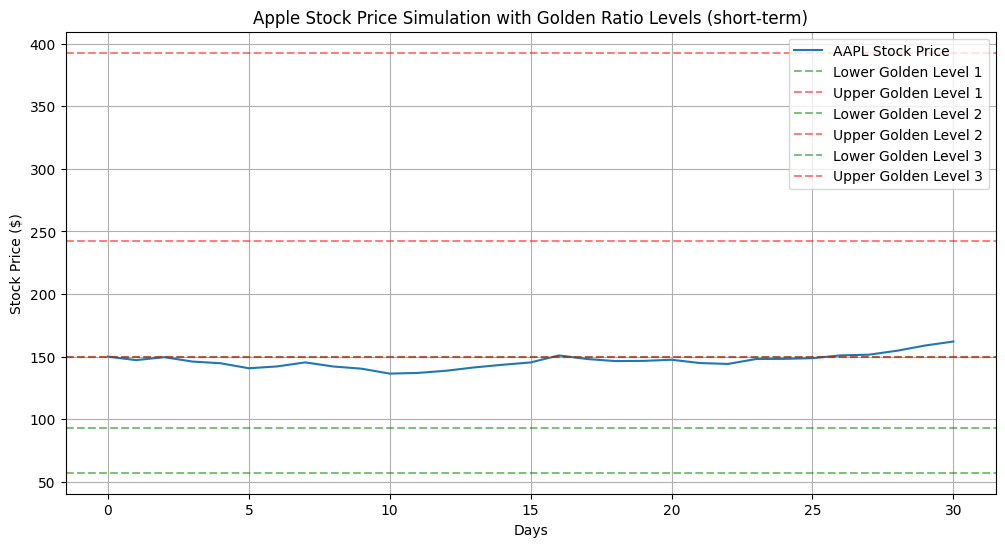


--- Short-term Simulation Results (30 days) ---
Initial Price: $150.00
Final Price: $162.08
Highest Price: $162.08
Lowest Price: $136.45

Golden Ratio Levels:
Level 1: Lower $92.71, Upper $242.71
Level 2: Lower $150.00, Upper $392.71
Level 3: Lower $57.29, Upper $150.00


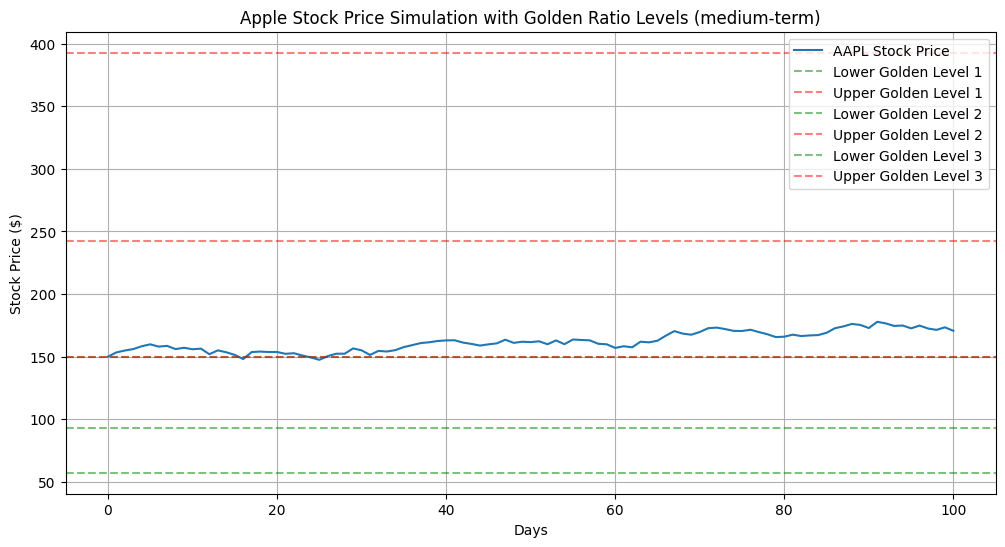


--- Medium-term Simulation Results (100 days) ---
Initial Price: $150.00
Final Price: $170.64
Highest Price: $177.83
Lowest Price: $147.46

Golden Ratio Levels:
Level 1: Lower $92.71, Upper $242.71
Level 2: Lower $150.00, Upper $392.71
Level 3: Lower $57.29, Upper $150.00


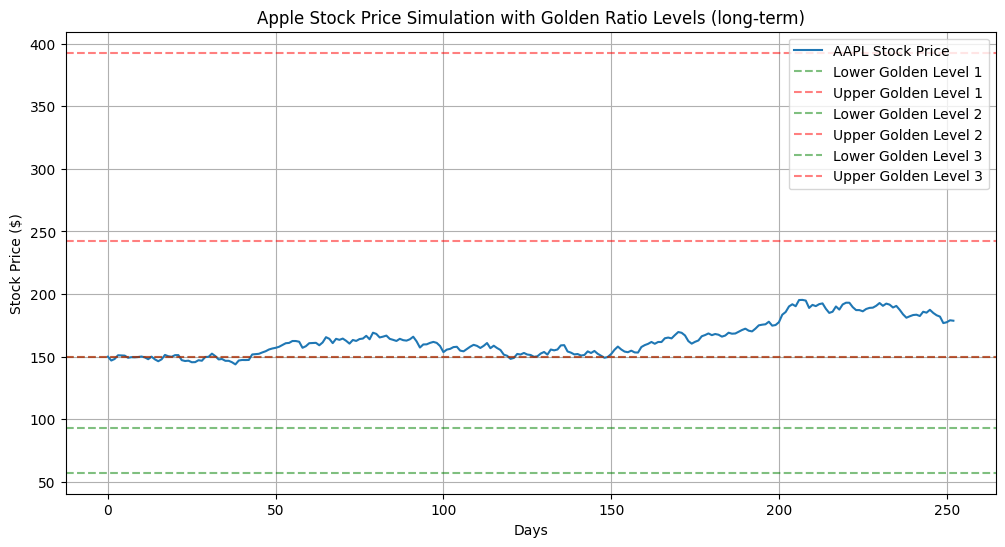


--- Long-term Simulation Results (252 days) ---
Initial Price: $150.00
Final Price: $178.69
Highest Price: $195.32
Lowest Price: $143.80

Golden Ratio Levels:
Level 1: Lower $92.71, Upper $242.71
Level 2: Lower $150.00, Upper $392.71
Level 3: Lower $57.29, Upper $150.00


In [3]:
"""
Abstract:
This script models the movements of Apple stock incorporating the golden ratio (φ ≈ 1.618).
It generates synthetic stock data based on historical volatility and uses the golden ratio
to create potential support and resistance levels. The model assumes that stock prices may
tend to move between levels that are related by the golden ratio. The script produces both
numerical data and a graphical representation of the simulated stock movements.

This version allows for flexible timeframe selection, enabling comparison between
short-term and long-term simulations.

Note: This is a simplified model for educational purposes and should not be used for actual
trading decisions. Real stock movements are influenced by many complex factors not
accounted for in this simulation.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
TRADING_DAYS = 252  # Average number of trading days in a year
INITIAL_PRICE = 150  # Starting price for AAPL
VOLATILITY = 0.2  # Annual volatility (20%)
GOLDEN_RATIO = (1 + 5 ** 0.5) / 2  # φ ≈ 1.618

# Timeframe options
TIMEFRAMES = {
    'short': 30,
    'medium': 100,
    'long': 252
}

def generate_stock_prices(initial_price, days, volatility):
    """
    Generate synthetic stock prices using geometric Brownian motion.

    Args:
    initial_price (float): The starting price of the stock
    days (int): Number of days to simulate
    volatility (float): Annual volatility of the stock

    Returns:
    np.array: Array of simulated daily stock prices
    """
    # Calculate daily volatility
    daily_volatility = volatility / np.sqrt(TRADING_DAYS)

    # Generate random returns
    returns = np.random.normal(0, daily_volatility, days)

    # Calculate price path
    price_path = initial_price * np.exp(np.cumsum(returns))

    return np.insert(price_path, 0, initial_price)

def calculate_golden_ratio_levels(price):
    """
    Calculate potential support and resistance levels based on the golden ratio.

    Args:
    price (float): Current price to base calculations on

    Returns:
    tuple: Lower and upper golden ratio levels
    """
    lower_level = price / GOLDEN_RATIO
    upper_level = price * GOLDEN_RATIO
    return lower_level, upper_level

def plot_stock_model(prices, golden_levels, timeframe):
    """
    Plot the simulated stock prices and golden ratio levels.

    Args:
    prices (np.array): Array of simulated stock prices
    golden_levels (list): List of tuples containing lower and upper golden ratio levels
    timeframe (str): The timeframe of the simulation
    """
    plt.figure(figsize=(12, 6))
    plt.plot(prices, label='AAPL Stock Price')

    for i, (lower, upper) in enumerate(golden_levels):
        plt.axhline(y=lower, color='g', linestyle='--', alpha=0.5,
                    label=f'Lower Golden Level {i+1}')
        plt.axhline(y=upper, color='r', linestyle='--', alpha=0.5,
                    label=f'Upper Golden Level {i+1}')

    plt.title(f'Apple Stock Price Simulation with Golden Ratio Levels ({timeframe}-term)')
    plt.xlabel('Days')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

def run_simulation(timeframe='medium'):
    """
    Run the stock price simulation for a given timeframe.

    Args:
    timeframe (str): The timeframe for the simulation ('short', 'medium', or 'long')
    """
    simulation_days = TIMEFRAMES.get(timeframe, TIMEFRAMES['medium'])

    # Generate simulated stock prices
    prices = generate_stock_prices(INITIAL_PRICE, simulation_days, VOLATILITY)

    # Calculate golden ratio levels (we'll use 3 levels for this example)
    golden_levels = [
        calculate_golden_ratio_levels(INITIAL_PRICE),
        calculate_golden_ratio_levels(INITIAL_PRICE * GOLDEN_RATIO),
        calculate_golden_ratio_levels(INITIAL_PRICE / GOLDEN_RATIO)
    ]

    # Plot the results
    plot_stock_model(prices, golden_levels, timeframe)

    # Print some numerical data
    print(f"\n--- {timeframe.capitalize()}-term Simulation Results ({simulation_days} days) ---")
    print(f"Initial Price: ${INITIAL_PRICE:.2f}")
    print(f"Final Price: ${prices[-1]:.2f}")
    print(f"Highest Price: ${np.max(prices):.2f}")
    print(f"Lowest Price: ${np.min(prices):.2f}")
    print("\nGolden Ratio Levels:")
    for i, (lower, upper) in enumerate(golden_levels):
        print(f"Level {i+1}: Lower ${lower:.2f}, Upper ${upper:.2f}")

# Run simulations for different timeframes
for timeframe in TIMEFRAMES.keys():
    run_simulation(timeframe)